<a href="https://colab.research.google.com/github/poolGolez/tf-playground/blob/main/NLP_Fundamentals_Follow_Through.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


In [1]:
# Check for GPU
!nvidia-smi

Fri Jun 23 03:26:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [3]:
# Helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-06-23 03:26:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-23 03:26:37 (89.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# The dataset (disaster or not disaster from tweets)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"
unzip_data('nlp_getting_started.zip')

--2023-06-23 03:26:37--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-06-23 03:26:38 (118 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



# Exploratory Data Analysis

In [5]:
train_df = pd.read_csv('train.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
tally = train_df['target'].value_counts()

print("Train dataset target occurences")
print(f"No(%): {tally[0]} ({tally[0]/tally.sum() * 100:.2f}%)")
print(f"Yes(%): {tally[1]} ({tally[1]/tally.sum() * 100:.2f}%)")

Train dataset target occurences
No(%): 4342 (57.03%)
Yes(%): 3271 (42.97%)


# Split train and validation set

In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['target'],
                                                  shuffle=True,
                                                  test_size=0.1,
                                                  random_state = 42)
len(X_train), len(y_train), len(X_val), len(y_val)

(6851, 6851, 762, 762)

In [8]:
pd.concat([X_train, y_train], axis=1).head(15)

,text,target
4620,'McFadden Reportedly to Test Hamstring Thursda...,0
2858,w--=-=-=-[ NEMA warns Nigerians to prepare for...,1
3098,When I was cooking earlier I got electrocuted ...,0
3751,I'm On Fire. http://t.co/WATsmxYTVa,0
5285,More than 40 families affected by the fatal ou...,1
5863,Why do u ruin everything? @9tarbox u ruined t...,0
4827,http://t.co/c1H7JECFrV @RoyalCarribean do your...,1
5190,WACKOES like #MicheleBachman predict the WORLD...,0
5784,@Reuters people like you should be charged aft...,0
4369,Remove the http://t.co/2nS5TfnxpA and Linkury ...,0


In [9]:
pd.concat([X_val, y_val], axis=1).head(15)

,text,target
2644,So you have a new weapon that can cause un-ima...,1
2227,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,Aftershock back to school kick off was great. ...,0
6845,in response to trauma Children of Addicts deve...,0
5559,@Calum5SOS you look like you got caught in a r...,0
1765,my favorite lady came to our volunteer meeting...,1
1817,@brianroemmele UX fail of EMV - people want to...,1
6810,Can't find my ariana grande shirt this is a f...,0
4398,The Murderous Story Of AmericaÛªs First Hijac...,1


# Play with TextVectorization

In [10]:
round(sum([len(stmt.split()) for stmt in X_train])/len(X_train))

15

In [11]:
VOCAB_SIZE = 2500
VECTOR_OUTPUT_LENGTH = 18
EMBEDDING_OUTPUT_DIMS = 256

vectorizer = tf.keras.layers.TextVectorization(
  max_tokens = VOCAB_SIZE,
  output_mode = 'int',
  output_sequence_length=15,
  name='vectorizer_layer'
)

In [12]:
vocab = vectorizer.get_vocabulary()
len(vocab)

2

In [13]:
# fit vectorizer to X_train
vectorizer.adapt(X_train)

In [14]:
vocab = vectorizer.get_vocabulary()
len(vocab)

2500

In [15]:
vocab[:15], vocab[-15:]

(['',
  '[UNK]',
  'the',
  'a',
  'in',
  'to',
  'of',
  'and',
  'i',
  'is',
  'for',
  'on',
  'you',
  'my',
  'with'],
 ['evil',
  'everyones',
  'estimated',
  'eruption',
  'error',
  'entertainment',
  'enemy',
  'emotionally',
  'elephant',
  'electrical',
  'election',
  'efforts',
  'education',
  'edition',
  'dvd'])

In [16]:
vectorizer([X_train[72]])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 980, 2381,  921,  132,    4,    1,   11,    1,  794,  218,    1,
        1188,   43,    1,  921]])>

In [17]:
original_stmt = X_train[72]
reconstructed_stmt = " ".join([ vocab[i] for i in vectorizer([X_train[72]])[0] ])

print(f"Original      > {original_stmt}")
print(f"Reconstructed > {reconstructed_stmt}")

Original      > Reported motor vehicle accident in Curry on Herman Rd near Stephenson involving an overturned vehicle. Please use... http://t.co/YbJezKuRW1
Reconstructed > reported motor vehicle accident in [UNK] on [UNK] rd near [UNK] involving an [UNK] vehicle


# Play with Embedding

In [18]:
def make_embedding():
  return tf.keras.layers.Embedding(
      input_dim=len(vocab),
      output_dim=32,
      input_length=101,
      name='embedding_layer'
  )

embedding = make_embedding()

In [19]:
X_train[72]

'Reported motor vehicle accident in Curry on Herman Rd near Stephenson involving an overturned vehicle. Please use... http://t.co/YbJezKuRW1'

In [20]:
embedding(vectorizer([X_train[72]]))

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[ 0.04261023,  0.00472315, -0.03111579,  0.01007954,
          0.00500375, -0.01549773, -0.00741715, -0.00287638,
          0.00512606, -0.03369428, -0.03032899,  0.0398461 ,
          0.00623815,  0.0132921 ,  0.04545108,  0.00317951,
          0.0040052 ,  0.02731461,  0.0445877 ,  0.03055615,
         -0.04081487, -0.01711982,  0.00215537,  0.0176926 ,
          0.0254388 ,  0.03213585, -0.01004431,  0.03464595,
          0.03108424,  0.03593313, -0.0179556 , -0.04357538],
        [-0.03618785,  0.04560587,  0.03384827, -0.00701929,
         -0.03064166,  0.02762916,  0.02841197, -0.0135637 ,
          0.04929138, -0.04756097,  0.02392688, -0.02670602,
         -0.00885911, -0.02928015, -0.01065539,  0.01073432,
          0.03945942, -0.00333338, -0.04867213, -0.00573363,
         -0.03499036, -0.00040561, -0.02974923,  0.04603961,
         -0.04645325,  0.03117175,  0.04037618,  0.00904123,
         -0.04724847,  0.025367

# Modelling


## Model 0 (Baseline): Naive Bayes with TF-IDF encoder

In [21]:
def build_model_0(X, y):
  from sklearn.pipeline import Pipeline
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.naive_bayes import MultinomialNB

  model = Pipeline([
      ('vectorizer', TfidfVectorizer()),
      ('clf', MultinomialNB())
  ])
  model.fit(X, y)

  return model


model_0 = build_model_0(X_train, y_train)

In [22]:
model_0_preds = model_0.predict(X_val)

model_0_preds.shape, model_0_preds[:15]

((762,), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]))

In [23]:
def score_predictions(y_true, y_pred):
  from sklearn.metrics import accuracy_score, precision_recall_fscore_support

  accuracy = accuracy_score(y_true, y_pred)
  precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  return {
      'accuracy': accuracy,
      'precision': precision,
      'recall': recall,
      'f1': f1
  }

score_predictions(y_val, model_0_preds)

{'accuracy': 0.7782152230971129,
 'precision': 0.792992256322435,
 'recall': 0.7782152230971129,
 'f1': 0.7703527809038113}

## Model 1: Feed-forwared neural network

In [24]:
def build_model_1(X, y):
  from tensorflow.keras.layers import Input, TextVectorization, Embedding, Dense, GlobalAveragePooling1D
  model = tf.keras.Sequential()
  inputs = Input(shape=(1, ), dtype=tf.string)
  model.add(inputs)
  model.add(vectorizer)

  embedding = make_embedding()
  model.add(embedding)

  pool = GlobalAveragePooling1D()
  model.add(pool)

  output = Dense(1, activation='sigmoid')
  model.add(output)

  return model

model_1 = build_model_1(X_train, y_train)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorizer_layer (TextVecto  (None, 15)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding)  (None, 15, 32)           80000     
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 80,033
Trainable params: 80,033
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

model_1.fit(X_train, y_train,
            epochs=10,
            validation_data=(X_val, y_val)
            )

Epoch 1/10
215/215 [==============================] - 23s 70ms/step - loss: 0.6484 - accuracy: 0.6386 - val_loss: 0.6122 - val_accuracy: 0.6890
Epoch 2/10
215/215 [==============================] - 2s 11ms/step - loss: 0.5481 - accuracy: 0.7593 - val_loss: 0.5384 - val_accuracy: 0.7690
Epoch 3/10
215/215 [==============================] - 2s 11ms/step - loss: 0.4697 - accuracy: 0.8012 - val_loss: 0.5034 - val_accuracy: 0.7795
Epoch 4/10
215/215 [==============================] - 2s 8ms/step - loss: 0.4237 - accuracy: 0.8218 - val_loss: 0.4890 - val_accuracy: 0.7835
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.3926 - accuracy: 0.8346 - val_loss: 0.4824 - val_accuracy: 0.7887
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.3682 - accuracy: 0.8466 - val_loss: 0.4808 - val_accuracy: 0.7874
Epoch 7/10
215/215 [==============================] - 2s 8ms/step - loss: 0.3497 - accuracy: 0.8524 - val_loss: 0.4810 - val_accuracy: 0.7835
Ep

In [26]:
model_1_preds = model_1.predict(X_val)

model_1_preds.shape, model_1_preds[:15]

24/24 [==============================] - 0s 2ms/step


((762, 1),
 array([[0.02301037],
        [0.15025818],
        [0.56457716],
        [0.01713599],
        [0.58820003],
        [0.1454416 ],
        [0.04624473],
        [0.35438812],
        [0.12150279],
        [0.73690766],
        [0.7431628 ],
        [0.34866095],
        [0.0403013 ],
        [0.3315014 ],
        [0.25434068]], dtype=float32))

In [27]:
model_1_preds = tf.squeeze(tf.round(model_1_preds))
model_1_preds[:15]

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
      dtype=float32)>

In [28]:
score_predictions(y_val, model_1_preds)

{'accuracy': 0.7847769028871391,
 'precision': 0.7873754369915379,
 'recall': 0.7847769028871391,
 'f1': 0.7816308704303432}

### Visualizing embedding


In [29]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorizer_layer (TextVecto  (None, 15)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding)  (None, 15, 32)           80000     
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 80,033
Trainable params: 80,033
Non-trainable params: 0
_________________________________________________________________


In [30]:
def download_embedding(model):
  import io
  weights = model.get_layer("embedding_layer").get_weights()[0]
  vocab = model.get_layer("vectorizer_layer").get_vocabulary()

  out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
  out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

  for index, word in enumerate(vocab):
    if index == 0:
      continue
    vec = weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + '\n')

  out_v.close()
  out_m.close()

  # try:
  #   from google.colab import files
  #   files.download('vectors.tsv')
  #   files.download('metadata.tsv')
  # except Exception:
  #   pass

# download_embedding(model_1)

## Model 2: LSTM (RNN)

In [31]:
from tensorflow.keras.layers import Input, Dense, LSTM

def build_model_2():
  return tf.keras.Sequential([
      Input(shape=(1, ), dtype=tf.string),
      vectorizer,
      make_embedding(),
      LSTM(256, return_sequences=True),
      LSTM(256),
      Dense(64, activation='relu'),
      Dense(1, activation='sigmoid')
  ], name='model_2')

model_2 = build_model_2()
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorizer_layer (TextVecto  (None, 15)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding)  (None, 15, 32)           80000     
                                                                 
 lstm (LSTM)                 (None, 15, 256)           295936    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                           

In [32]:
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_2_history = model_2.fit(X_train, y_train,
                              epochs=5,
                              validation_split=0.2)

Epoch 1/5
172/172 [==============================] - 16s 60ms/step - loss: 0.5381 - accuracy: 0.7230 - val_loss: 0.5110 - val_accuracy: 0.7637
Epoch 2/5
172/172 [==============================] - 4s 22ms/step - loss: 0.3794 - accuracy: 0.8392 - val_loss: 0.4848 - val_accuracy: 0.7644
Epoch 3/5
172/172 [==============================] - 3s 17ms/step - loss: 0.3321 - accuracy: 0.8617 - val_loss: 0.5167 - val_accuracy: 0.7615
Epoch 4/5
172/172 [==============================] - 3s 18ms/step - loss: 0.2956 - accuracy: 0.8807 - val_loss: 0.5271 - val_accuracy: 0.7557
Epoch 5/5
172/172 [==============================] - 2s 12ms/step - loss: 0.2620 - accuracy: 0.8965 - val_loss: 0.6507 - val_accuracy: 0.7520


<Axes: >

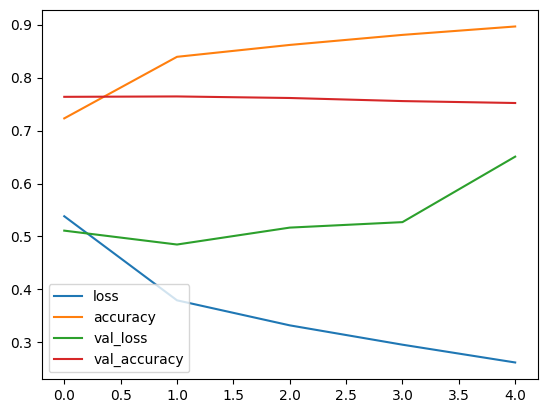

In [33]:
pd.DataFrame(model_2_history.history).plot()

In [34]:
model_2_predictions = tf.squeeze(tf.round(model_2.predict(X_val)))

model_2_predictions[:15]

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
      dtype=float32)>

In [35]:
score_predictions(y_val, model_2_predictions)

{'accuracy': 0.7454068241469817,
 'precision': 0.7449311194875726,
 'recall': 0.7454068241469817,
 'f1': 0.7430584452472759}

## Model 3: GRU (RNN)

In [36]:
from tensorflow.keras.layers import GRU

def build_model_3():
  return tf.keras.Sequential([
      Input(shape=(1,), dtype=tf.string),
      vectorizer,
      make_embedding(),
      GRU(64, return_sequences=True),
      GRU(64),
      Dense(1, activation='sigmoid')
  ], name='model_3')

model_3 = build_model_3()
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorizer_layer (TextVecto  (None, 15)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding)  (None, 15, 32)           80000     
                                                                 
 gru (GRU)                   (None, 15, 64)            18816     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 123,841
Trainable params: 123,841
Non-trainable params: 0
_____________________________________________________

In [37]:
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3_history = model_3.fit(X_train, y_train,
                              epochs=5,
                              validation_split=0.2)

Epoch 1/5
172/172 [==============================] - 19s 75ms/step - loss: 0.5454 - accuracy: 0.7133 - val_loss: 0.5005 - val_accuracy: 0.7702
Epoch 2/5
172/172 [==============================] - 2s 14ms/step - loss: 0.3806 - accuracy: 0.8316 - val_loss: 0.4956 - val_accuracy: 0.7659
Epoch 3/5
172/172 [==============================] - 4s 26ms/step - loss: 0.3228 - accuracy: 0.8697 - val_loss: 0.6270 - val_accuracy: 0.7622
Epoch 4/5
172/172 [==============================] - 4s 22ms/step - loss: 0.2912 - accuracy: 0.8828 - val_loss: 0.5759 - val_accuracy: 0.7535
Epoch 5/5
172/172 [==============================] - 3s 15ms/step - loss: 0.2677 - accuracy: 0.8965 - val_loss: 0.6596 - val_accuracy: 0.7557


<Axes: >

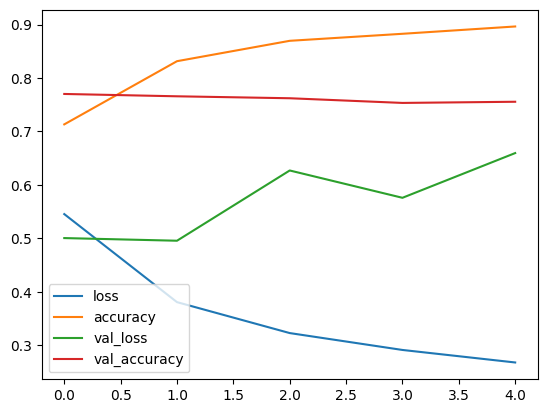

In [38]:
pd.DataFrame(model_3_history.history).plot()

In [39]:
model_3_predictions = tf.squeeze(tf.round(model_3.predict(X_val)))

model_3_predictions[:15]

24/24 [==============================] - 1s 6ms/step


<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
      dtype=float32)>

In [40]:
score_predictions(y_val, model_3_predictions)

{'accuracy': 0.7585301837270341,
 'precision': 0.7577203103393924,
 'recall': 0.7585301837270341,
 'f1': 0.7574828652491313}

## Model 4: Bidirectional-LSTM (RNN)

In [49]:
from tensorflow.keras.layers import Bidirectional

def build_model_4():
  return tf.keras.Sequential([
      Input(shape=(1,), dtype=tf.string),
      vectorizer,
      make_embedding(),
      Bidirectional(LSTM(64)),
      Dense(1, activation='sigmoid')
  ])

model_4 = build_model_4()
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorizer_layer (TextVecto  (None, 15)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding)  (None, 15, 32)           80000     
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 129,793
Trainable params: 129,793
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_4_history = model_4.fit(X_train, y_train,
            epochs=5,
            validation_split=0.2)

Epoch 1/5
172/172 [==============================] - 22s 95ms/step - loss: 0.5484 - accuracy: 0.7088 - val_loss: 0.4695 - val_accuracy: 0.7870
Epoch 2/5
172/172 [==============================] - 5s 29ms/step - loss: 0.3715 - accuracy: 0.8422 - val_loss: 0.4790 - val_accuracy: 0.7761
Epoch 3/5
172/172 [==============================] - 5s 32ms/step - loss: 0.3167 - accuracy: 0.8684 - val_loss: 0.5226 - val_accuracy: 0.7819
Epoch 4/5
172/172 [==============================] - 3s 20ms/step - loss: 0.2807 - accuracy: 0.8883 - val_loss: 0.5455 - val_accuracy: 0.7659
Epoch 5/5
172/172 [==============================] - 2s 11ms/step - loss: 0.2495 - accuracy: 0.9033 - val_loss: 0.6140 - val_accuracy: 0.7586


<Axes: >

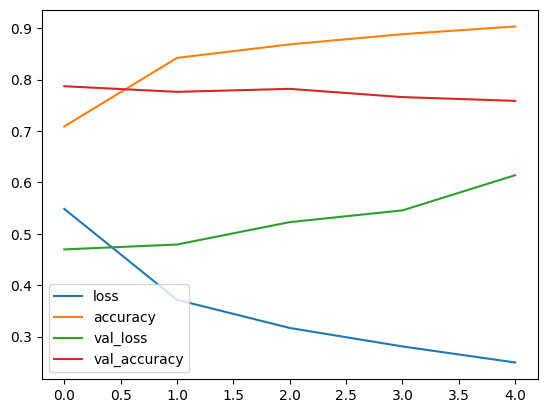

In [51]:
pd.DataFrame(model_4_history.history).plot()

In [52]:
model_4_predictions = tf.squeeze(tf.round(model_4.predict(X_val)))

model_4_predictions[:15]

24/24 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
      dtype=float32)>

In [53]:
score_predictions(y_val, model_4_predictions)

{'accuracy': 0.7637795275590551,
 'precision': 0.7633729036821736,
 'recall': 0.7637795275590551,
 'f1': 0.7620176986357639}

## Model 5: 1D Convolutional Network

## Model 6: Tensorflow Hub Pretrained Feature Extractor

## Model 7: TensorFlow Hub PretrainedFEature Extrator with 10% of data